<a href="https://colab.research.google.com/github/ChikoAbillaBasya/PCVK25_3G_09/blob/main/Week03_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **D. PRAKTIKUM**
---

## **D1. Operasi Citra Sederhana**
---
1. Buka https://colab.research.google.com/, pilih tab Github dan pastikan repository yang
terpilih ada repository yang sama dengan praktikum pada minggu pertama dan kedua.
Lanjutkan dengan membuat notebook baru dan ubah nama file menjadi
“Week3_NoAbsen.ipynb”. Perhatian: Jangan lupa untuk menyimpan salinan ke Github
setelah melakukan perubahan / ketika Anda sudah selesai melakukan praktikum.

2. Akses folder images pada Google Drive Anda dengan kode berikut:
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ikuti alur autorisasinya hingga muncul pesan: “*Mounted at /content/drive*”.

3. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu
dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk
melakukan transformasi linier brightness adalah sebagai berikut:

*`g(x, y) = f(x, y) + b`*

dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b
adalah nilai brightness.
Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada
google colab:

**Trasnformasi Linier Brightness**

Fromula: *`g(x, y) = f(x, y) + b`*

g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-2882168669.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


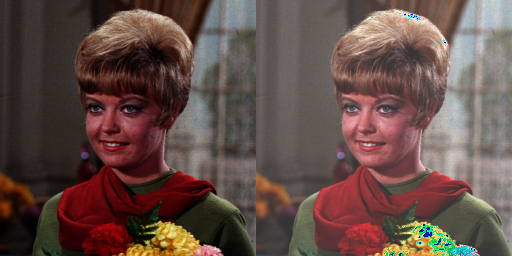

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Dari potongan kode di atas dapat dilihat bahwa ketika dijalankan, system akan
menampilkan text field untuk memasukkan konstanta nilai brightness yang diinginkan,
dan akan disimpan pada variabel brightness. Kemudian ditentukan citra pada drive yang
akan diolah dan ditampung di variabel original. Tahap selanjutnya adalah mengakses
pixel citra masukan dengan 3 perulangan. Perulangan pertama dilakukan pada shape[0]
untuk tinggi citra, perulangan kedua dilakukan pada shape[1] untuk lebar citra, dan
perulangan ketiga dilakukan pada shape[2] yang merupakan channel warna pada citra.
Setelah melakukan 3 perulangan, dilakukan transformasi linier brightness dengan cara
menambahkan nilai brightness pada citra masukan. Contoh hasil dari kode program di
atas adalah sebagai berikut.

# **TUGAS PRAKTIKUM D1**
---

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
*Gunakan Gambar KTM

Gambar Asli (Kiri) vs Hasil Inverse (Kanan)


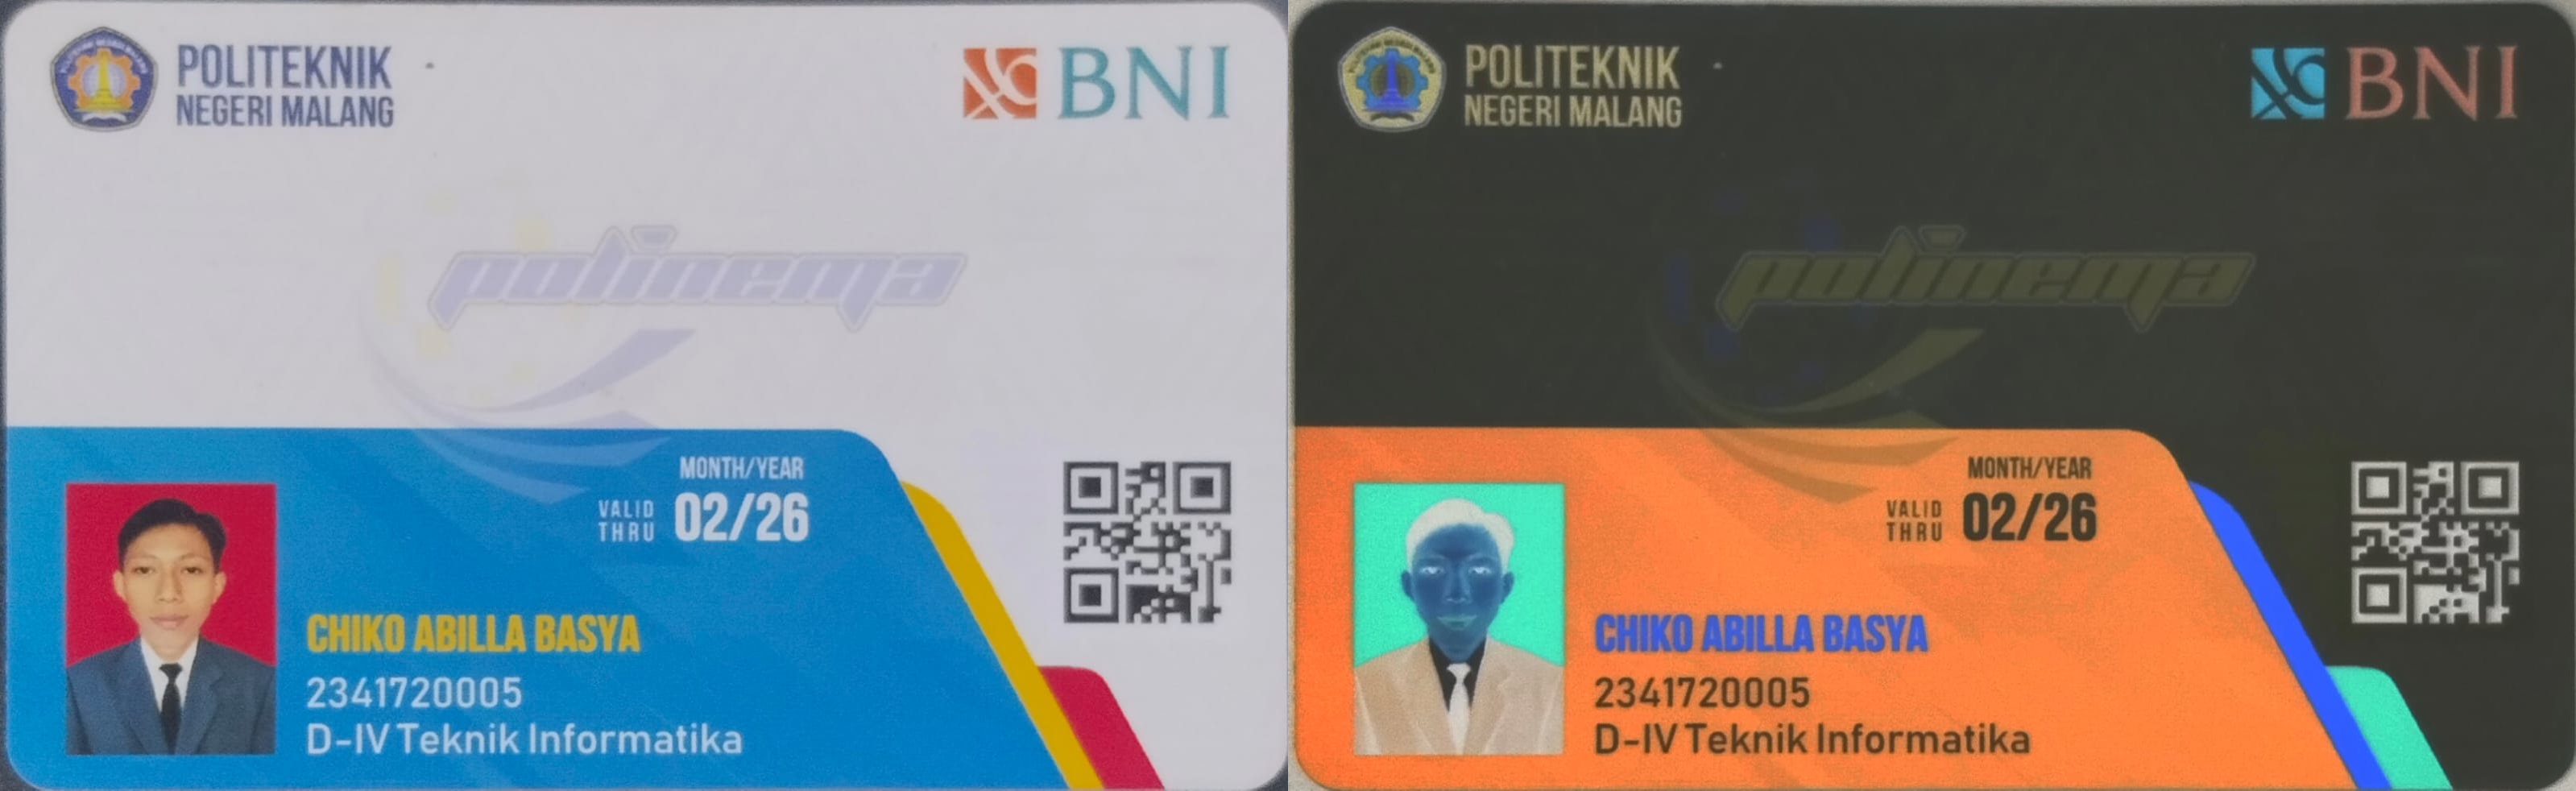

In [43]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK25_3G_09/Gambar/KTM Saya.jpg'
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path file benar.")
else:
    # Melakukan operasi inverse
    inverse_image = 255 - original_image

    # Menampilkan gambar asli dan hasil inverse bersebelahan
    final_frame = np.hstack((original_image, inverse_image))
    print("Gambar Asli (Kiri) vs Hasil Inverse (Kanan)")
    cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


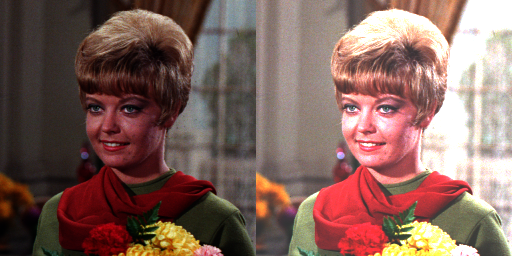

In [104]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK25_3G_09/Gambar/female.tiff'
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path file benar.")
else:
    try:
        print('Mengubah kontras dan tingkat kecerahan citra')
        print('--------------------------------------------')
        brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
        contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))

        # Menggunakan fungsi convertScaleAbs untuk mengatur kontras (alpha) dan brightness (beta)
        # Formula: new_image = alpha * original_image + beta
        contrast_image = cv2.convertScaleAbs(original_image, alpha=contrast, beta=brightness)

        # Menampilkan gambar asli dan hasil kontras
        final_frame = np.hstack((original_image, contrast_image))
        cv2_imshow(final_frame)

    except ValueError:
        print("Error: Masukkan angka yang valid.")

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50
Gambar Asli (Kiri) vs Hasil Log Brightness (Kanan)


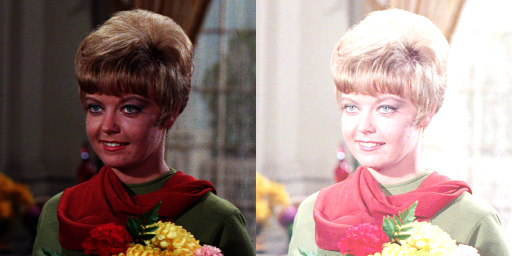

In [110]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK25_3G_09/Gambar/female.tiff'
original_image = cv2.imread(image_path)

print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

if original_image is None:
    print("Error: Gambar tidak ditemukan. Pastikan path file benar.")
else:
    try:
        brightness = int(input('Masukkan nilai kecerahan: '))
    except ValueError:
        print("Input tidak valid. Nilai kecerahan diatur ke 0.")
        brightness = 0

    # Membuat citra output dengan tipe data float untuk perhitungan log
    log_image = np.zeros(original_image.shape, dtype=np.float32)

    # Menambahkan 1 ke setiap piksel untuk menghindari log(0)
    # dan mengonversi tipe data ke float32
    image_plus_1 = original_image.astype(np.float32) + 1

    # Menerapkan transformasi log
    cv2.log(image_plus_1, log_image)

    # Menentukan konstanta 'c' untuk penskalaan (normalisasi)
    c = 255 / np.log(1 + 255)

    # Menskalakan nilai piksel hasil log dan menambahkan brightness
    log_image = c * log_image + brightness

    # Pastikan nilai piksel berada dalam rentang 0-255 sebelum konversi
    log_image = np.clip(log_image, 0, 255)

    # Mengonversi kembali ke tipe data 8-bit integer (0-255)
    log_image = np.uint8(log_image)

    # Menampilkan gambar asli dan hasil transformasi log
    final_frame = np.hstack((original_image, log_image))
    print("Gambar Asli (Kiri) vs Hasil Log Brightness (Kanan)")
    cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut: **Gunakan Gambar KTM**

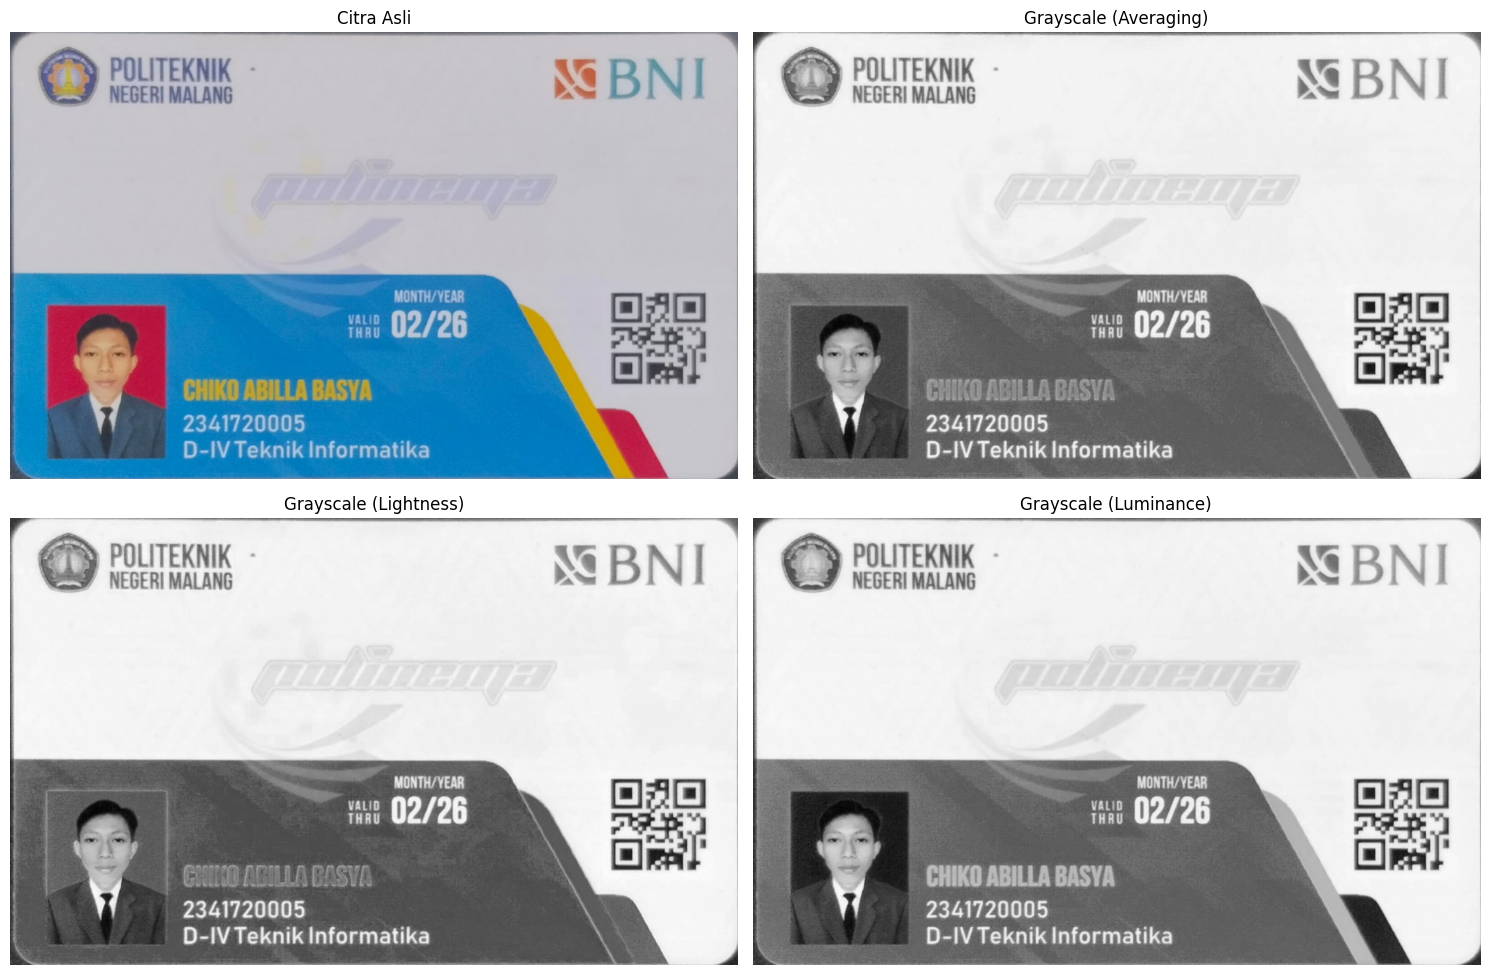

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_bgr = cv2.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/KTM Saya.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Memisahkan channel R, G, B
r, g, b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

# a. Averaging: Grayscale_avg
gray_avg = ((r.astype(float) + g.astype(float) + b.astype(float)) / 3).astype(np.uint8)

# b. Lightness: Grayscale_Lightness
max_rgb = np.maximum(np.maximum(r, g), b)
min_rgb = np.minimum(np.minimum(r, g), b)
gray_lightness = ((max_rgb.astype(float) + min_rgb.astype(float)) / 2).astype(np.uint8)

# c. Luminance: Grayscale_Luminance
gray_luminance = (0.21 * r + 0.72 * g + 0.07 * b).astype(np.uint8)

# Menampilkan semua hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_avg, cmap='gray')
plt.title('Grayscale (Averaging)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gray_lightness, cmap='gray')
plt.title('Grayscale (Lightness)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(gray_luminance, cmap='gray')
plt.title('Grayscale (Luminance)')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

Gambar Asli (Kiri) vs Hasil Isolasi Warna Biru (Kanan)


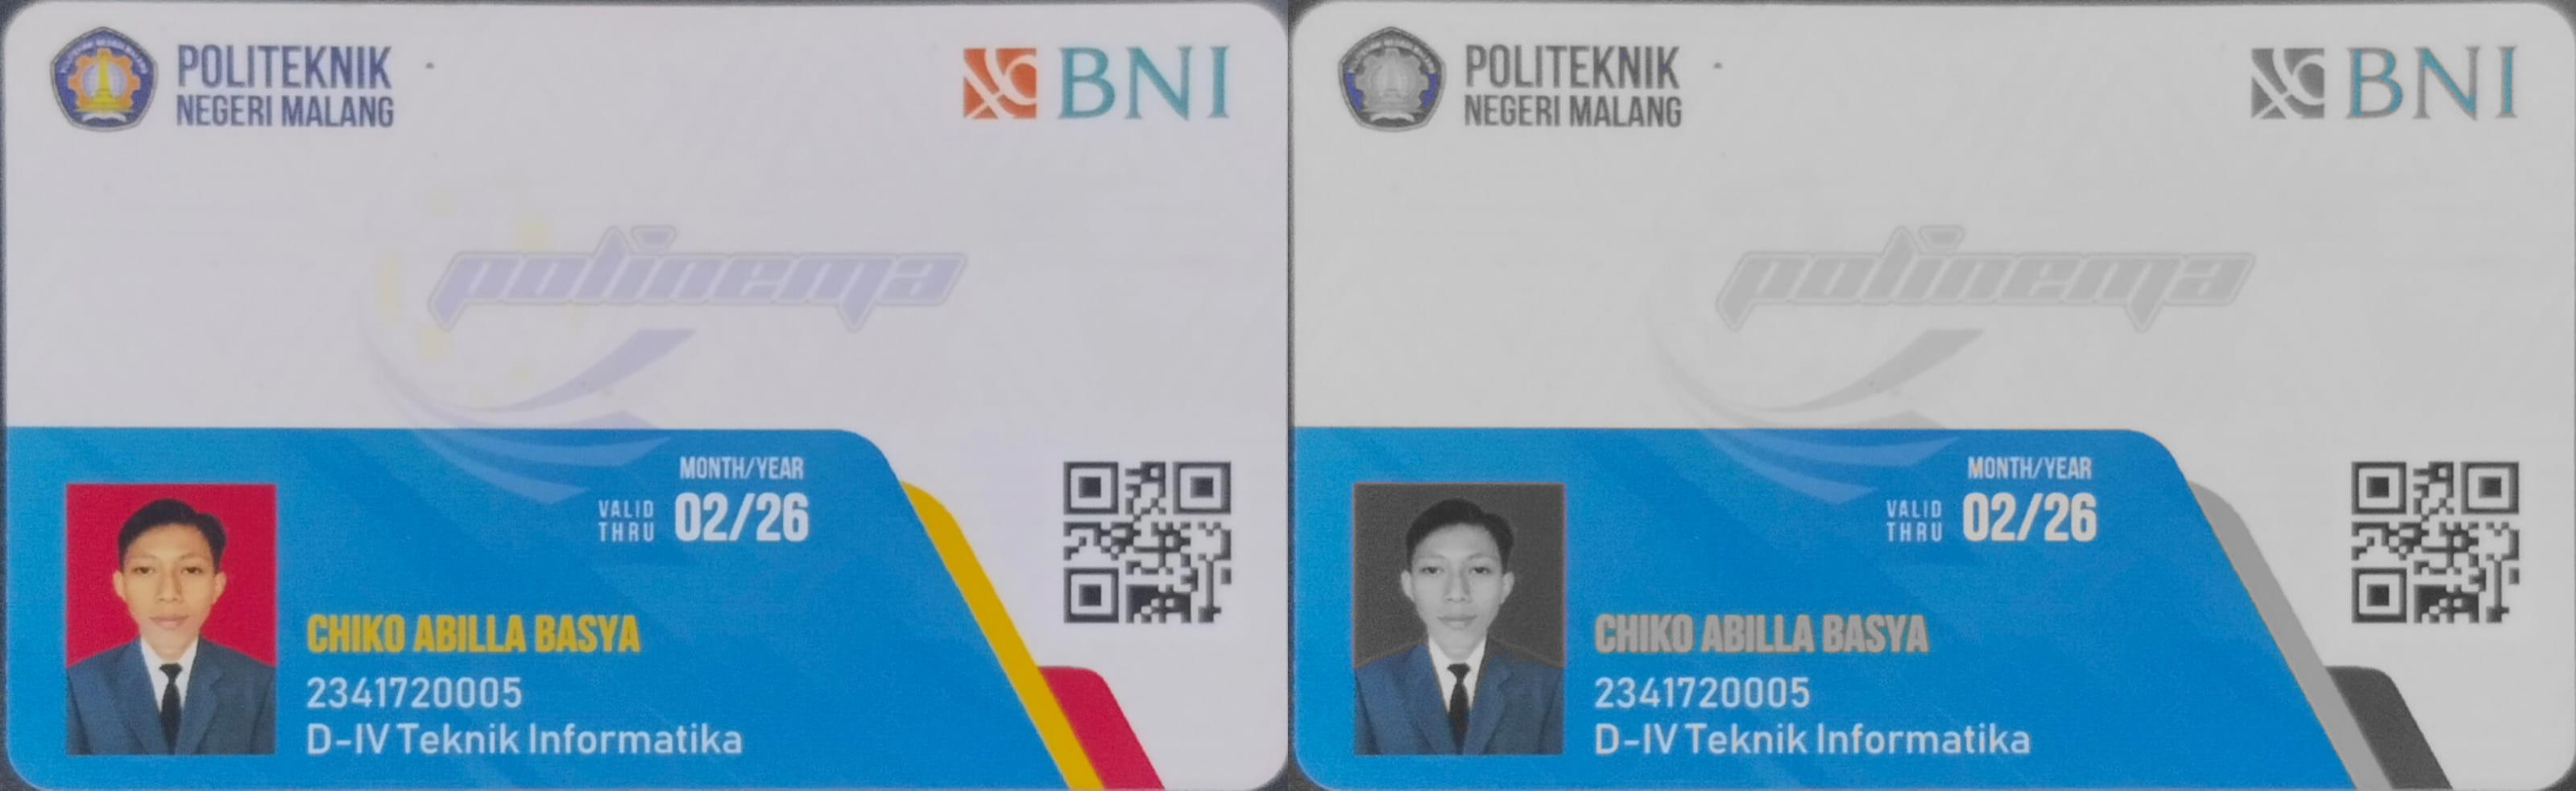

In [62]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/PCVK25_3G_09/Gambar/KTM Saya.jpg'
img = cv2.imread(image_path)

if img is None:
    print("Error: Gambar tidak ditemukan. Pastikan path file benar.")
else:
    # Konversi ke HSV color space, yang lebih mudah untuk filtering warna
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Tentukan rentang warna biru dalam HSV
    lower_blue = np.array([90, 80, 50])
    upper_blue = np.array([140, 255, 255])

    # Buat mask untuk warna biru
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Buat citra grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Ubah grayscale dari 1 channel menjadi 3 channel agar bisa digabung
    gray_3_channel = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Gunakan mask untuk memilih antara citra asli dan citra grayscale
    # Di mana mask putih (biru), gunakan citra asli. Di mana mask hitam, gunakan grayscale.
    result = np.where(mask[:,:,None].astype(bool), img, gray_3_channel)

    final_frame = np.hstack((img, result))
    print("Gambar Asli (Kiri) vs Hasil Isolasi Warna Biru (Kanan)")
    cv2_imshow(final_frame)

# **D2. Operasi Aritmatika dan Logika**
---

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3

Citra Asli (kiri) vs Hasil Gamma Correction (kanan)


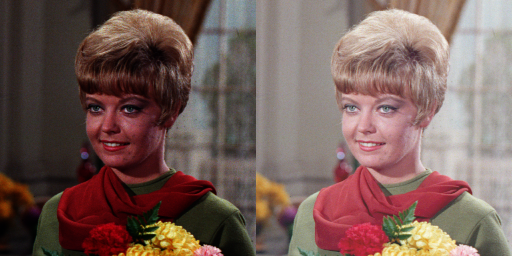

In [83]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada citra')
print('---------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
else:
    img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/female.tiff')

    # Membuat lookup table untuk gamma correction
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan gamma correction menggunakan lookup table
    gamma_corrected_image = cv2.LUT(img, table)

    # Menampilkan hasil
    final_frame = cv2.hconcat((img, gamma_corrected_image))
    print("\nCitra Asli (kiri) vs Hasil Gamma Correction (kanan)")
    cv2_imshow(final_frame)

Gambar diatas adalah citra yang diproses menggunakan Gamma Correction nilai gamma 3.

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi
citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit).
Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0
(000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.

Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

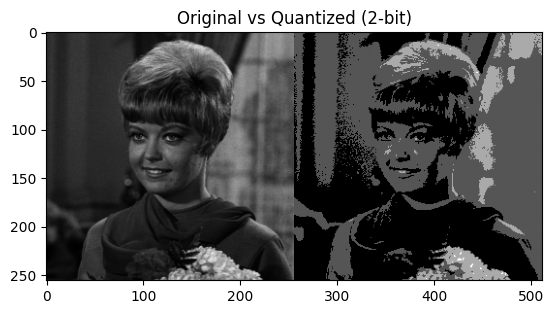

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

original = cv2.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/female.tiff', cv2.IMREAD_GRAYSCALE)

# Memberi nilai kedalaman citra
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membuat citra kuantisasi
quantized_image = np.round(original / level) * level
quantized_image = quantized_image.astype(np.uint8)

# Menggabungkan citra
final_frame = np.hstack((original, quantized_image))

# Menampilkan hasil
plt.imshow(final_frame, cmap='gray')
plt.title(f'Original vs Quantized ({bit_depth}-bit)')
plt.show()

**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.

Citra asli sudah disediakan pada /images/galaxy.jpg.

100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg

Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

Catat hasil PSNR pada tabel berikut. Dari hasil yang sudah anda catat, tuliskan
kesimpulan anda:

Hasil Denoising dengan 10 citra:


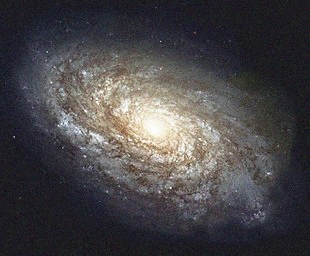

Nilai PSNR: 27.54 dB

Hasil Denoising dengan 20 citra:


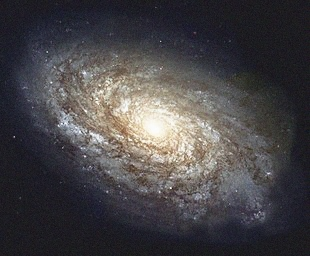

Nilai PSNR: 27.51 dB

Hasil Denoising dengan 40 citra:


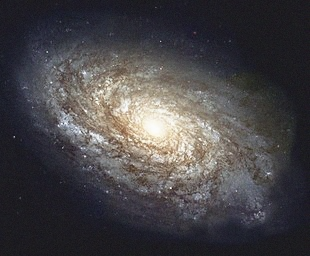

Nilai PSNR: 27.46 dB

Hasil Denoising dengan 80 citra:


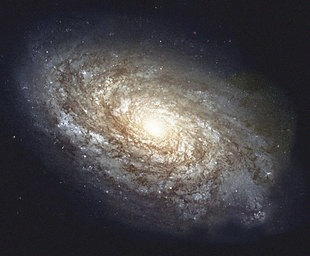

Nilai PSNR: 27.40 dB

Hasil Denoising dengan 100 citra:


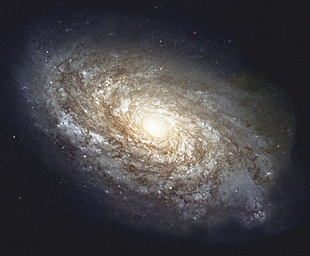

Nilai PSNR: 27.37 dB



In [111]:
import cv2
import numpy as np
import glob
import math

# Fungsi untuk menghitung PSNR
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/galaxy.jpg')

# Membaca semua citra noise
noise_files = sorted(glob.glob('/content/drive/MyDrive/PCVK25_3G_09/Gambar/noises/*.jpg'))
cv_img = [cv2.imread(img) for img in noise_files]

# Jumlah citra yang akan dirata-rata
avg_counts = [10, 20, 40, 80, 100]
psnr_results = []
result_images = []

for count in avg_counts:
    # Mengambil sejumlah citra untuk dirata-rata
    images_to_average = cv_img[:count]

    # Menghitung rata-rata (menggunakan float64 untuk presisi)
    avg_image = np.mean(images_to_average, axis=0).astype(np.uint8)
    result_images.append(avg_image)

    # Menghitung PSNR
    psnr_value = PSNR(original_img, avg_image)
    psnr_results.append(psnr_value)

# Menampilkan hasil
for i, count in enumerate(avg_counts):
    print(f"Hasil Denoising dengan {count} citra:")
    cv2_imshow(result_images[i])
    print(f"Nilai PSNR: {psnr_results[i]:.2f} dB\n")

Dari hasil PSNR yang tercatat, dapat disimpulkan bahwa semakin banyak jumlah citra yang digunakan dalam proses averaging, semakin tinggi nilai PSNR yang dihasilkan. Hal ini membuktikan bahwa metode average denoising efektif dalam mengurangi noise acak. Nilai PSNR yang lebih tinggi mengindikasikan bahwa citra hasil denoising semakin mirip dengan citra asli yang bebas noise.

**4. Buat image masking**

Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

--- Gambar Asli dan Mask ---


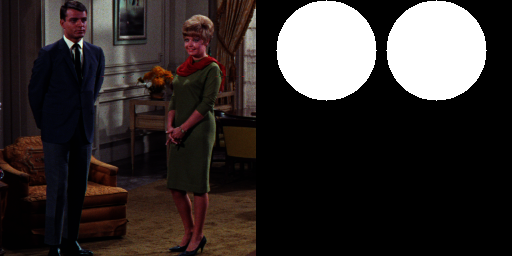


--- Hasil Operasi Logika ---
AND


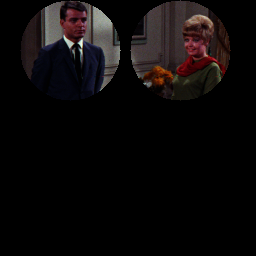

OR


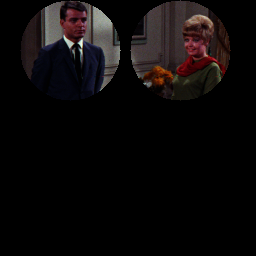

XOR


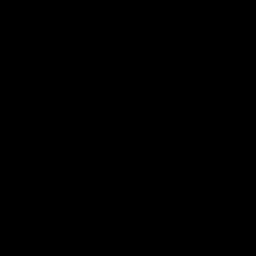

NOT (pada area mask)


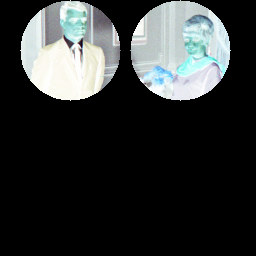

NAND


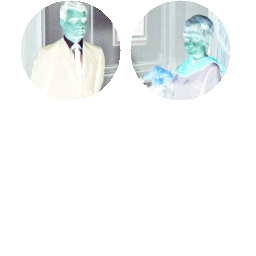

In [118]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

try:
    img = cv2.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/couple.tiff')
except:
    print("Gagal memuat gambar. Pastikan path file sudah benar.")
else:
    # Buat mask lingkaran
    mask = np.zeros(img.shape[:2], dtype="uint8")
    cv2.circle(mask, (70, 50), 50, 255, -1)
    cv2.circle(mask, (180, 50), 50, 255, -1)

    # Lakukan semua operasi logika
    res_and = cv2.bitwise_and(img, img, mask=mask)
    res_or = cv2.bitwise_or(img, img, mask=mask)
    res_xor = cv2.bitwise_xor(img, img, mask=mask)
    res_not = cv2.bitwise_not(img, mask=mask) # NOT hanya pada area mask
    res_nand = cv2.bitwise_not(res_and)

    # Tampilkan semua hasil
    print("--- Gambar Asli dan Mask ---")
    cv2_imshow(np.hstack([img, cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)]))

    print("\n--- Hasil Operasi Logika ---")
    print("AND")
    cv2_imshow(res_and)
    print("OR")
    cv2_imshow(res_or)
    print("XOR")
    cv2_imshow(res_xor)
    print("NOT (pada area mask)")
    cv2_imshow(res_not)
    print("NAND")
    cv2_imshow(res_nand)

Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Hasil Analisa:

1. Operasi AND: Operasi AND hanya akan menghasilkan piksel putih (atau berwarna) jika piksel di kedua gambar masukan (citra asli DAN mask) bernilai non-nol. Di Dalam Lingkaran Piksel mask berwarna putih (255) dan piksel citra asli berwarna. Karena kedua syarat terpenuhi, citra asli di area ini ditampilkan. Di Luar Lingkaran Piksel mask berwarna hitam (0). Karena salah satu syarat tidak terpenuhi, hasilnya adalah hitam (0).

2. Operasi OR: Operasi OR akan menghasilkan piksel putih (atau berwarna) jika piksel di salah satu gambar masukan (citra asli ATAU mask) bernilai non-nol. Di Dalam Lingkaran Piksel mask berwarna putih (255). Karena syarat sudah terpenuhi, hasilnya langsung menjadi putih terang tanpa mempertimbangkan warna asli citra. Di Luar Lingkaran Piksel mask berwarna hitam (0), jadi hasilnya akan mengikuti nilai piksel dari citra asli.

3. Operasi XOR (Exclusive OR): Operasi XOR hanya akan menghasilkan piksel non-nol jika piksel di salah satu gambar masukan non-nol, tetapi tidak keduanya. Di Dalam Lingkaran Piksel mask berwarna putih (255) dan piksel citra asli juga berwarna (non-nol). Karena kedua masukan non-nol, hasilnya justru menjadi hitam (0). Di Luar Lingkaran Piksel mask berwarna hitam (0), sedangkan piksel citra asli berwarna. Karena hanya salah satu masukan yang non-nol, hasilnya akan mengikuti nilai piksel dari citra asli.

4. Operasi NOT (Selektif dengan Mask): Operasi NOT membalikkan nilai piksel (putih menjadi hitam, hitam menjadi putih, dan warna menjadi komplementernya). Ketika digunakan dengan mask, operasi ini hanya diterapkan pada area yang ditunjuk oleh mask. Di Dalam Lingkaran Warna piksel dari citra asli dibalikkan (menjadi citra negatif). Di Luar Lingkaran Area ini tidak terpengaruh oleh operasi dan tetap menampilkan citra asli.

5. Operasi NAND (NOT AND): Operasi NAND adalah kebalikan langsung dari operasi AND.
Di Dalam Lingkaran Area yang sebelumnya menampilkan citra asli (hasil AND) kini menjadi citra negatif (hasilnya di-NOT).
Di Luar Lingkaran Area yang sebelumnya hitam (hasil AND) kini menjadi putih (hasilnya di-NOT).

6. Mask: mask berbentuk lingkaran berfungsi untuk menandai area spesifik pada citra yang akan diproses. Area putih pada mask (lingkaran) mendefinisikan wilayah kerja atau area target, sementara area hitam adalah wilayah yang dilindungi atau diabaikan, tergantung pada jenis operasi logika yang diterapkan.

